### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('NEOCoin.csv')

In [4]:
df.head()

,unix,date,symbol,open,high,low,close,Volume USD,Volume NEO
0,1705881600000,2024-01-22 0:00:00,NEO/USD,11.724,11.743,11.624,11.624,1263.132945,108.665945
1,1705795200000,2024-01-21 0:00:00,NEO/USD,11.701,11.907,11.624,11.624,8469.440555,728.616703
2,1705708800000,2024-01-20 0:00:00,NEO/USD,11.457,11.726,11.356,11.695,14238.810120,1217.512623
3,1705622400000,2024-01-19 0:00:00,NEO/USD,11.507,11.615,10.830,11.486,41605.851390,3622.309890
4,1705536000000,2024-01-18 0:00:00,NEO/USD,11.945,12.287,11.350,11.535,52202.078430,4525.537792


In [5]:
df.tail()

,unix,date,symbol,open,high,low,close,Volume USD,Volume NEO
2325,1505001600,2017-09-10 0:00:00,NEO/USD,22.60,25.40,19.53,23.81,3844551.92,172319.91
2326,1504915200,2017-09-09 0:00:00,NEO/USD,25.89,25.92,22.18,22.60,3181014.53,133108.92
2327,1504828800,2017-09-08 0:00:00,NEO/USD,31.15,31.39,22.32,25.89,7883609.21,295659.85
2328,1504742400,2017-09-07 0:00:00,NEO/USD,29.90,31.64,29.21,31.15,407901.78,13389.04
2329,1504742400,2017-09-07 0:00:00,NEO/USD,29.90,31.64,29.21,31.15,407901.78,13389.04


In [6]:
df1=df.reset_index()['close']

In [7]:
df1

0       11.624
1       11.624
2       11.695
3       11.486
4       11.535
         ...  
2325    23.810
2326    22.600
2327    25.890
2328    31.150
2329    31.150
Name: close, Length: 2330, dtype: float64

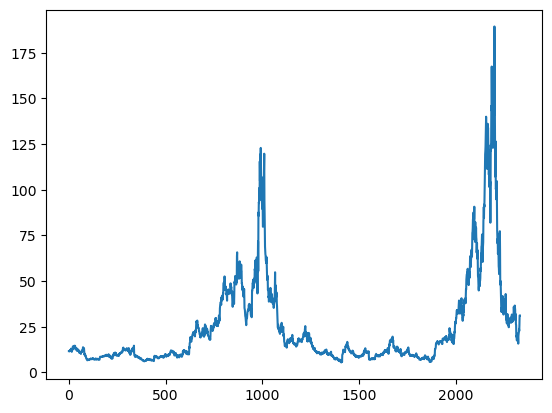

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [10]:
import numpy as np

In [11]:
df1

0       11.624
1       11.624
2       11.695
3       11.486
4       11.535
         ...  
2325    23.810
2326    22.600
2327    25.890
2328    31.150
2329    31.150
Name: close, Length: 2330, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.0338169 ]
 [0.0338169 ]
 [0.03420266]
 ...
 [0.11132844]
 [0.13990763]
 [0.13990763]]


In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(1514, 816)

In [16]:
train_data

array([[0.0338169 ],
       [0.0338169 ],
       [0.03420266],
       ...,
       [0.0197392 ],
       [0.0199511 ],
       [0.02151046]])

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(1413, 100)
(1413,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(715, 100)
(715,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, Model

In [23]:
### Create the Stacked LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [24]:
from keras.layers import Input, Dense
from keras.models import Model

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

23/23 [==============================] - 31s 590ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 2/100
23/23 [==============================] - 5s 207ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 3/100
23/23 [==============================] - 6s 279ms/step - loss: 9.5356e-04 - val_loss: 0.0029
Epoch 4/100
23/23 [==============================] - 6s 263ms/step - loss: 7.5754e-04 - val_loss: 0.0035
Epoch 5/100
23/23 [==============================] - 7s 288ms/step - loss: 8.2630e-04 - val_loss: 0.0032
Epoch 6/100
23/23 [==============================] - 6s 281ms/step - loss: 6.8024e-04 - val_loss: 0.0049
Epoch 7/100
23/23 [==============================] - 6s 274ms/step - loss: 8.2926e-04 - val_loss: 0.0025
Epoch 8/100
23/23 [==============================] - 7s 289ms/step - loss: 6.2685e-04 - val_loss: 0.0026
Epoch 9/100
23/23 [==============================] - 7s 290ms/step - loss: 6.3067e-04 - val_loss: 0.0028
Epoch 10/100
23/23 [==============================] - 6s 282m

In [27]:
tf.__version__

'2.15.0'

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 [==============================] - 1s 50ms/step


In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

27.020519248189395

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

45.38403888463021

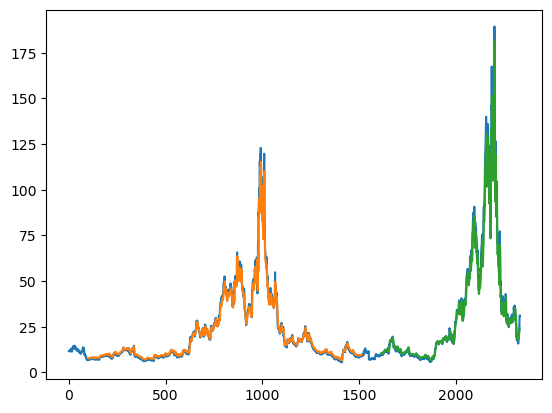

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

816

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 475)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.017337679978266768,
 0.01311056778049443,
 0.010301548492257541,
 0.008964955175224124,
 0.010975278456941046,
 0.007334963325183373,
 0.00856832382504754,
 0.0070143982613420225,
 0.0021298560173865777,
 0.0017658245042108077,
 0.0016951915240423776,
 0.002167889160554194,
 0.0039826134202662275,
 0.0025753871230643835,
 0.004406411301276829,
 0.005759304536810644,
 0.0037163814180929053,
 0.004178212442271116,
 0.0033958163542515615,
 0.008872588970388479,
 0.012436837815810918,
 0.010915512089106218,
 0.014430861179027435,
 0.01550665580005433,
 0.012757402879652269,
 0.016870415647921765,
 0.01650638413474599,
 0.010774246128769358,
 0.010100516164085846,
 0.013338766639500135,
 0.011904373811464274,
 0.018147242597120347,
 0.01646291768541157,
 0.02145069274653627,
 0.02083129584352078,
 0.02618853572398805,
 0.03955446889432219,
 0.039011138277641945,
 0.040695463189350724,
 0.04259712034773159,
 0.04591143710948111,
 0.05536538983971747,
 0.057267046998098335,
 0.058951371909

In [38]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=474
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.01311057 0.01030155 0.00896496 0.01097528 0.00733496 0.00856832
 0.0070144  0.00212986 0.00176582 0.00169519 0.00216789 0.00398261
 0.00257539 0.00440641 0.0057593  0.00371638 0.00417821 0.00339582
 0.00887259 0.01243684 0.01091551 0.01443086 0.01550666 0.0127574
 0.01687042 0.01650638 0.01077425 0.01010052 0.01333877 0.01190437
 0.01814724 0.01646292 0.02145069 0.0208313  0.02618854 0.03955447
 0.03901114 0.04069546 0.04259712 0.04591144 0.05536539 0.05726705
 0.05895137 0.05737571 0.05764738 0.0598207  0.06204836 0.06356968
 0.05987503 0.06242869 0.05764738 0.05922304 0.05677805 0.05482206
 0.05368106 0.05455039 0.05889704 0.05819071 0.05987503 0.06166802
 0.06253735 0.06221136 0.06324368 0.06188536 0.06253735 0.06172236
 0.06253735 0.06395001 0.06226569 0.06117903 0.05672372 0.05748438
 0.05601739 0.05498506 0.06998098 0.07036131 0.07144798 0.06970932
 0.06818799 0.06965499 0.06851399 0.06845966 0.07133931 0.07237164
 0.07372996 0.07503396 0.07535996 0.07405596 0.0673

0 day output [[0.13250707]]
1 day input [0.01030155 0.00896496 0.01097528 0.00733496 0.00856832 0.0070144
 0.00212986 0.00176582 0.00169519 0.00216789 0.00398261 0.00257539
 0.00440641 0.0057593  0.00371638 0.00417821 0.00339582 0.00887259
 0.01243684 0.01091551 0.01443086 0.01550666 0.0127574  0.01687042
 0.01650638 0.01077425 0.01010052 0.01333877 0.01190437 0.01814724
 0.01646292 0.02145069 0.0208313  0.02618854 0.03955447 0.03901114
 0.04069546 0.04259712 0.04591144 0.05536539 0.05726705 0.05895137
 0.05737571 0.05764738 0.0598207  0.06204836 0.06356968 0.05987503
 0.06242869 0.05764738 0.05922304 0.05677805 0.05482206 0.05368106
 0.05455039 0.05889704 0.05819071 0.05987503 0.06166802 0.06253735
 0.06221136 0.06324368 0.06188536 0.06253735 0.06172236 0.06253735
 0.06395001 0.06226569 0.06117903 0.05672372 0.05748438 0.05601739
 0.05498506 0.06998098 0.07036131 0.07144798 0.06970932 0.06818799
 0.06965499 0.06851399 0.06845966 0.07133931 0.07237164 0.07372996
 0.07503396 0.07535996 

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
import matplotlib.pyplot as plt

In [41]:
len(df1)

2330

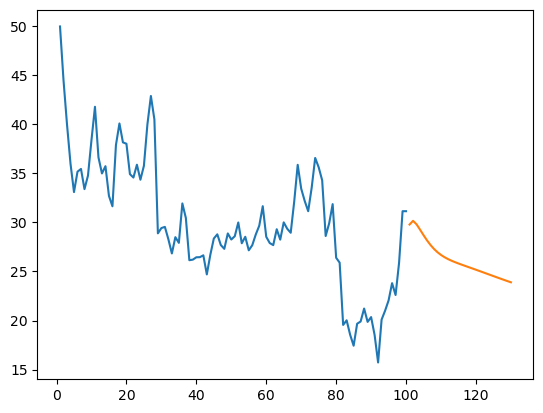

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[2230:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
x=(day_new,scaler.inverse_transform(df1[2230:]))
y=(day_pred,scaler.inverse_transform(lst_output))
plt.xlabel("Number of days")
plt.ylabel("Crypto Price in Thousand")

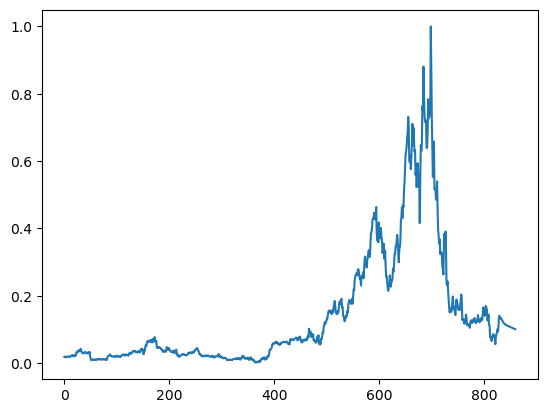

In [43]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1500:])

In [44]:
df3=scaler.inverse_transform(df3).tolist()

In [45]:
print(df3)

[[11.624], [11.624], [11.695], [11.486], [11.535], [11.860999999999999], [12.159000000000002], [11.975], [11.943000000000001], [12.328], [12.331], [12.949], [12.306], [11.607], [12.011], [11.272], [12.073], [12.273], [12.902], [12.412999999999998], [13.897], [14.246], [13.98], [13.488], [13.847], [13.721000000000002], [14.369], [13.732999999999999], [14.569000000000003], [13.662000000000003], [14.262], [14.101], [14.543], [13.425], [12.575000000000001], [12.526], [12.860999999999999], [13.103999999999997], [13.033000000000001], [13.094], [12.859], [12.135], [11.768000000000002], [12.940999999999999], [12.780000000000001], [12.649], [12.134], [11.862000000000002], [12.206000000000001], [12.079000000000002], [12.204000000000002], [11.739], [11.193], [11.141], [10.82], [10.9], [10.573], [10.905], [11.316], [11.013], [11.013], [10.677], [10.094], [11.002], [11.335], [11.044], [11.138], [11.438], [12.056], [11.454], [11.620999999999999], [12.46], [12.91], [13.749], [12.794], [13.164], [12.5

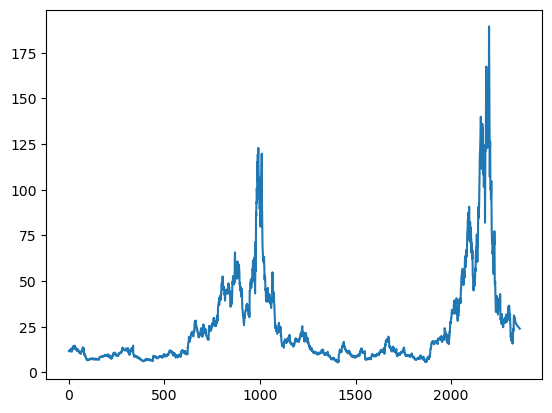

In [46]:
plt.plot(df3)

In [ ]:
import pickle

In [ ]:
pickle.dump(df3,open('neocoin.pkl','wb'))